In [11]:
import bs4
import requests
import pandas as pd
import numpy as np
import boto3

def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    '''
    This function reads from the provided URL, default is 
    https://en.wikipedia.org/wiki/Michael_Jordan
    It returns a Python dictionary:
       * The keys are be the column names
       * The values are be a list that contains a different columns; 
         The element of each list will be a separate row for that column. 
    '''
    # read the webpage 
    response = requests.get(link)
    # create a BeautifulSoup object to parse the HTML  
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable'; 
    #therefore we create a tag object "table"
    table=soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row  
    headers=table.tr
    #the table column names are displayed  as an abbreviation; therefore we find all the abbr tags and returs an Iterator
    titles=headers.find_all("abbr")
    #we create a dictionary  and pass the table headers as the keys 
    data = {title['title']:[] for title in titles}
   #we will store each column as a list in a dictionary, the header of the column will be the dictionary key 

    #we iterate over each table row by fining each table tag tr and assign it to the objed
    for row in table.find_all('tr')[1:]:
    
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n 
        for key,a in zip(data.keys(),row.find_all("td")[2:]):
            # we append each elment and strip any extra HTML contnet 
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == ".")))

    # we remove extra rows by finding the smallest list     
    Min=min([len(x)  for x in data.values()])
    #we convert the elements in the key to floats 
    for key in data.keys():
    
        data[key]=list(map(lambda x: float(x), data[key][:Min]))
       
    return data


In [21]:
# Question 1: Web Scraping the data and Converting to Pandas Dataframe

# To get full marks, you must display the first five rows of the dataframe for 
# each player using the method head with the name of each player printed above.

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

links = ['https://en.wikipedia.org/wiki/Michael_Jordan',\
         'https://en.wikipedia.org/wiki/Kobe_Bryant',\
         'https://en.wikipedia.org/wiki/LeBron_James',\
         'https://en.wikipedia.org/wiki/Stephen_Curry']
names = ['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry']

# Create an empty dictionary
players_data = {}
# Iterate over the name/link pairs and fill in the name->data(frame) mappings
for name,link in zip(names, links) :
    #Scrape the data
    dc = get_basketball_stats(link)
    #Convert it into a data frame and store
    players_data[name] = pd.DataFrame(dc)
    
# Iterate over the dictionary and print 
for (name, data) in players_data.items():
    print(name)
    display(data.head())

Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5


Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5


Lebron James


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0


Stephen Curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0


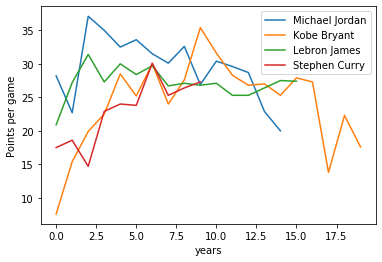

In [26]:
# Question 2: plot the Points per game for a player using the function plt.plot().
import matplotlib.pyplot as plt

# Define the column name
COL_NAME = 'Points per game'

# Iterate over the dictionary and plot the data
plt.figure()
for (name, data) in players_data.items():
    plt.plot(data[[COL_NAME]], label = name)

# Set the legend and the axis labels
plt.legend()
plt.xlabel('years')
plt.ylabel(COL_NAME)

plt.show()

In [45]:
# Question 3: Store the Player Statistics in Object Storage (optional).
import ibm_boto3
from ibm_botocore.client import Config

def player_to_csv_name(name):
    '''This function converts the player name into a csv file name'''
    return name.lower().replace(" ","_")+".csv"

# Iterate over the dictionary and plot the data
for (name, data) in players_data.items():
    # Construct the csv file name
    csv_name = player_to_csv_name(name)
    print("Storing the '"+name+"' data into "+ csv_name)
    # Store the data into file
    data.to_csv("data/"+csv_name)
    print("done")

Storing the 'Michael Jordan' data into michael_jordan.csv
done
Storing the 'Kobe Bryant' data into kobe_bryant.csv
done
Storing the 'Lebron James' data into lebron_james.csv
done
Storing the 'Stephen Curry' data into stephen_curry.csv
done


In [39]:
# @hidden_cell

#Define credentials
credentials = {
} #Erased for the security reasons

In [40]:
bucket_name = "ivan-cc-tutorial"
auth_endpoint = 'https://iam.bluemix.net/oidc/token'
service_endpoint = 'https://s3-api.us-geo.objectstorage.softlayer.net'

resource = ibm_boto3.resource('s3', ibm_api_key_id = credentials['apikey'],
                              ibm_service_instance_id = credentials['resource_instance_id'],
                              ibm_auth_endpoint = auth_endpoint,
                              config = Config(signature_version = 'oauth'), 
                              endpoint_url = service_endpoint)




In [46]:
import os

#Get the current directory to read the files in
directory = os.getcwd()

# Iterate over the player names, read the csv files and place them into the remote buckets
for name in players_data.keys():
    csv_name = player_to_csv_name(name)
    csv_path = directory+ "/data/" + csv_name
    with open(csv_path, 'r') as f:
        print("Reading file " + name + " for player " + name + \
              " and placing it into bucket: " + bucket_name + "/"+csv_name)
        resource.Bucket(name = bucket_name).put_object(Key = csv_name, Body = f.read())
        print("done")

Reading file Michael Jordan for player Michael Jordan and placing it into bucket: ivan-cc-tutorial/michael_jordan.csv
done
Reading file Kobe Bryant for player Kobe Bryant and placing it into bucket: ivan-cc-tutorial/kobe_bryant.csv
done
Reading file Lebron James for player Lebron James and placing it into bucket: ivan-cc-tutorial/lebron_james.csv
done
Reading file Stephen Curry for player Stephen Curry and placing it into bucket: ivan-cc-tutorial/stephen_curry.csv
done


In [43]:
# Question 4: Create URL to Share .csv (optional)
import boto3

#Create the client object
client = boto3.client(
    's3',
    aws_access_key_id = credentials["cos_hmac_keys"]['access_key_id'],
        aws_secret_access_key = credentials["cos_hmac_keys"]["secret_access_key"],
        endpoint_url=service_endpoint,

)

# Iterate over the player names, and generate the urls
for name in players_data.keys():
    csv_name = player_to_csv_name(name)
    Params = {'Bucket': bucket_name, 'Key': csv_name}
    time = 7*24*60**2 + 10
    url=client.generate_presigned_url('get_object',Params=Params,ExpiresIn=time)
    print("The url to share " + name + " data is: " + url)


The url to share Michael Jordan data is: https://s3-api.us-geo.objectstorage.softlayer.net/ivan-cc-tutorial/michael_jordan.csv?AWSAccessKeyId=7d6b8a1ad2ec4fc199306aeec7ffcd3c&Signature=yA5HwykdQsP83Mc53PAjkSYykf0%3D&Expires=1581331272
The url to share Kobe Bryant data is: https://s3-api.us-geo.objectstorage.softlayer.net/ivan-cc-tutorial/kobe_bryant.csv?AWSAccessKeyId=7d6b8a1ad2ec4fc199306aeec7ffcd3c&Signature=RSwQopFWJf%2FEeIzan1SLiajPoEk%3D&Expires=1581331272
The url to share Lebron James data is: https://s3-api.us-geo.objectstorage.softlayer.net/ivan-cc-tutorial/lebron_james.csv?AWSAccessKeyId=7d6b8a1ad2ec4fc199306aeec7ffcd3c&Signature=TbBXpWPNkkAo%2FOuPiv6x4cyDIgU%3D&Expires=1581331272
The url to share Stephen Curry data is: https://s3-api.us-geo.objectstorage.softlayer.net/ivan-cc-tutorial/stephen_curry.csv?AWSAccessKeyId=7d6b8a1ad2ec4fc199306aeec7ffcd3c&Signature=%2FXyXS75YVGFoIRpLHGdIW9KeVhM%3D&Expires=1581331272
